In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [430]:
# Creamos el Dataframe a partir del dataset en CSV
# Google Play Store Apps
df = pd.read_csv('googleplaystore.csv')

In [431]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Analise inicial

In [432]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [433]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [434]:
print(df['Installs'].dtype)

object


# Limpieza

In [435]:
# Limpiar la columna 'Installs' eliminando '+' y comas, y convertir a tipo numérico
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')

In [436]:
# Eliminar filas con valores no numéricos en la columna 'Installs'
df = df[df['Installs'].str.isnumeric()]

In [437]:
df = df.copy()
df['Installs'] = df['Installs'].astype("int64")

In [438]:
total_installs = df['Installs'].sum()
print(total_installs)

167633433487


In [439]:
# Verificar categorias por Apps
contagem_categorias = df['Category'].value_counts()
print(contagem_categorias)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


In [440]:
# Identificar a entrada com categoria '1.9'
categoria_1_9 = df[df['Category'] == '1.9']

# Examinar a entrada
print(categoria_1_9)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [441]:
# Remover a entrada com categoria '1.9' do DataFrame
df = df[df['Category'] != '1.9']

# Verificar se a entrada foi removida
contagem_categorias = df['Category'].value_counts()
print(contagem_categorias)


Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


#### Datos nulos

In [442]:
print(df.isnull().sum())  # Verificar datos nulos


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [443]:
df = df.dropna()  # Eliminar filas con datos nulos

In [444]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Duplicados

In [445]:
#verificar datos duplicados en la columna "App"
duplicados = df[df.duplicated(subset='App', keep=False)]

In [446]:
duplicados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,500000,Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,100000,Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,50000,Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,1000000,Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [447]:
duplicados_ordenados = duplicados.sort_values(by='App')


In [448]:
duplicados_ordenados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [449]:
#Elimina entradas duplicadas, si existen, basándote en la columna 'App'.
df = df.drop_duplicates(subset='App', keep='first')

In [450]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Selecionar Columnas 

In [451]:
# Crear nuevo DataFrame con columnas específicas 

novo_df = df[["App", "Category", "Rating", "Installs", "Genres", ]]

# Verificar as primeiras linhas do novo DataFrame
novo_df.head()


,App,Category,Rating,Installs,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,500000,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000,Art & Design;Creativity


In [452]:
df.to_csv('Googleapp_limpio')

# Análisis

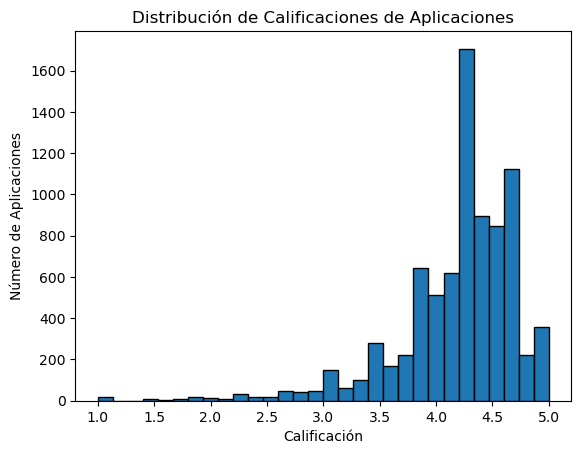

In [453]:
plt.hist(novo_df['Rating'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Calificación')
plt.ylabel('Número de Aplicaciones')
plt.title('Distribución de Calificaciones de Aplicaciones')
plt.show()

In [454]:
contagem_generos = novo_df['Genres'].value_counts()


In [455]:
# Obtener los 10 géneros principales por número de aplicaciones
top_generos = contagem_generos.head(10)
top_generos

Genres
Tools              716
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    296
Action             292
Medical            290
Sports             266
Name: count, dtype: int64

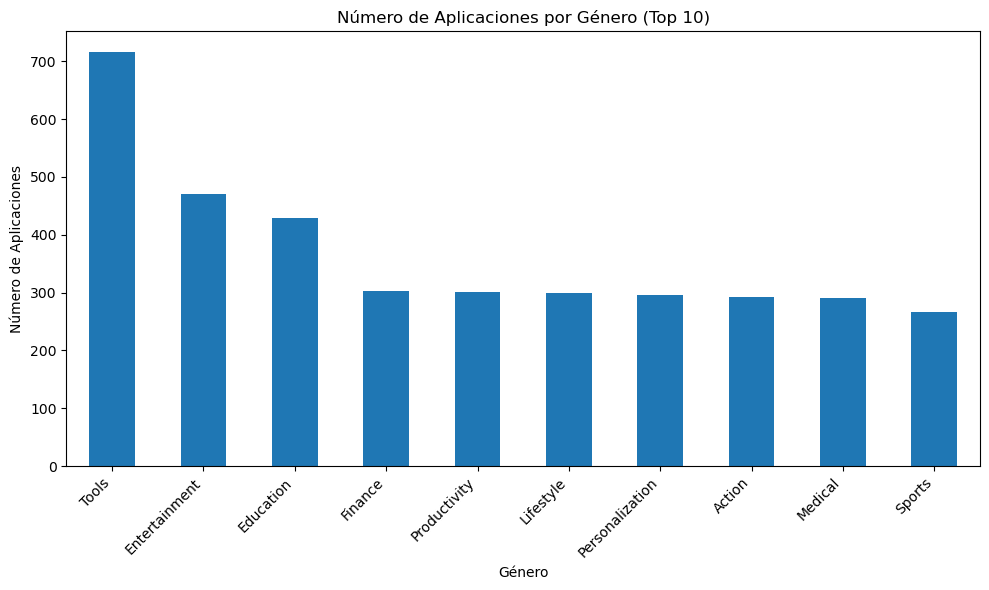

In [456]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Número de Aplicaciones')
plt.title('Número de Aplicaciones por Género (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()


In [457]:
# Ahora puedes agrupar por el género y sumar las instalaciones
instalaciones_por_genero = nov
o_df.groupby('Genres')['Installs'].sum()



NameError: name 'nov' is not defined

In [ ]:
# Ordenar las categorías por el número de descargas en orden descendente
categorias_mas_descargas = instalaciones_por_genero.sort_values(ascending=False)[:10]
categorias_mas_descargas

In [ ]:

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(categorias_mas_descargas, labels=categorias_mas_descargas.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Generos por Número de Descargas')
plt.show()


In [ ]:
# Filtrar las filas donde el género es "Communication"
aplicaciones_comunicacion = novo_df[novo_df['Genres'] == 'Communication']

# Ordenar por número de descargas en orden descendente
aplicaciones_comunicacion_ordenadas = aplicaciones_comunicacion.sort_values(by='Installs', ascending=False)[:10]

# Mostrar la lista de aplicaciones de Comunicación ordenadas por número de descargas
print(aplicaciones_comunicacion_ordenadas[['App', 'Installs']])


In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(aplicaciones_comunicacion_ordenadas['App'], aplicaciones_comunicacion_ordenadas['Installs'], color='skyblue')
plt.xlabel('Número de Descargas')
plt.ylabel('Aplicación')
plt.title('Top 10 Aplicaciones de Comunicación por Número de Descargas')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la aplicación con más descargas en la parte superior
plt.tight_layout()
plt.show()
